# Taller 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from IPython.display import clear_output

In [2]:
gamma = 0.9
epsilon = 1e-2*(1-gamma)/(2*gamma)
demanda = poisson(10)
M = 100

### Inicializa problema

In [27]:
#Define funciones necesarias para la recompenza

def O(u):
    if u!=0:
        return max(2+2*u, 0)
    elif u==0:
        return 0

def h(s):
    return max(s,0)

def f(s):
    return max(10*s,0)

def rewF(estado,accion):
    if estado+accion>0:
        states = np.arange(estado+accion)
        rew1 = np.sum(np.multiply(np.vectorize(f)(states), demanda.pmf(states)))
        rew2 = f(estado+accion)*demanda.sf(estado+accion-1)
        return rew1+rew2
    else: 
        return 0

In [28]:
#inicializa estados acciones, rewards y probs de transicion

estados = np.arange(0,M+1)
acciones = {}
for estado in estados:
    acciones[estado] = np.arange(0,M+1-estado)

rewards = {}
for estado in estados:
    for accion in acciones[estado]:
        rewards[(estado,accion)] = -O(accion) - h(estado+accion) + rewF(estado,accion)

probTrans={}
for estado in estados:
    for accion in acciones[estado]:
        for sigEstado in estados:
            if estado+accion<sigEstado:
                probTrans[(sigEstado, estado, accion)] = 0
            elif estado+accion>=sigEstado and sigEstado!=0:
                probTrans[(sigEstado, estado, accion)] = demanda.pmf(estado+accion-sigEstado)
            elif estado+accion>=sigEstado and sigEstado==0:
                probTrans[(sigEstado, estado, accion)] = demanda.sf(estado+accion-1)

## Value iteration

In [5]:
#inicializa random policy y random value

policyVI = {}
for s in acciones.keys():
    policyVI[s] = np.random.choice(acciones[s])

valueVI = {}
for s in estados:
    valueVI[s] = 0
    
allValuesVI = {}

### Algoritmo

In [6]:
iterat = 0
while True and iterat<10000:
    allValuesVI[iterat] = valueVI
    biggest_change = 0
    valueNuevo = {}
    for estado in estados:
        if estado in policyVI:
            
            old_v = valueVI[estado]
            new_v = 0
            
            for accion in acciones[estado]:
                v = [probTrans[(est2, estado, accion)]*valueVI[est2] for est2 in estados]
                v = rewards[(estado,accion)]+gamma*np.sum(v)
                if v>new_v:
                    new_v = v
                    policyVI[estado] = accion
            
            valueNuevo[estado] = new_v
            biggest_change = max(biggest_change, np.abs(old_v-new_v))
    valueVI = valueNuevo                            
    if biggest_change<epsilon:
        break
    iterat+=1 
    clear_output(wait=True)
    print("Iteration: ", iterat, "\nBiggest_change: ", biggest_change)

Iteration:  111 
Biggest_change:  0.0005771565216718955


Text(0, 0.5, 'Policy')

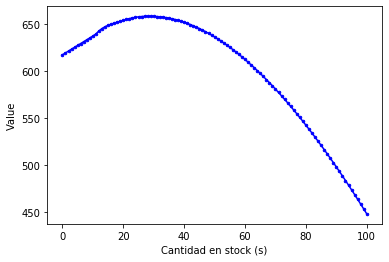

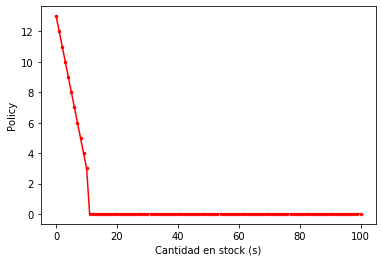

In [7]:
plt.figure()
plt.plot(np.arange(M+1), [valueVI[i] for i in estados], marker='o', ms=2.5, c='b')
plt.xlabel("Cantidad en stock (s)")
plt.ylabel("Value")

plt.figure()
plt.plot(np.arange(M+1), [policyVI[i] for i in estados], marker='o', ms=2.5, c='r')
plt.xlabel("Cantidad en stock (s)")
plt.ylabel("Policy")

## Gauss-Seidel

In [8]:
#inicializa random policy y random value

policyGS = {}
for s in acciones.keys():
    policyGS[s] = np.random.choice(acciones[s])

valueGS = {}
for s in estados:
    valueGS[s] = 0
    
allValuesGS = {}

### Algoritmo

In [9]:
iterat = 0
while True and iterat<10000:
    allValuesGS[iterat] = valueGS.copy()
    biggest_change = 0
    for estado in estados:
        if estado in policyGS:
            
            old_v = valueGS[estado]
            new_v = 0
            
            for accion in acciones[estado]:
                v = [probTrans[(est2, estado, accion)]*valueGS[est2] for est2 in estados]
                v = rewards[(estado,accion)]+gamma*np.sum(v)
                if v>new_v:
                    new_v = v
                    policyGS[estado] = accion
            
            valueGS[estado] = new_v
            biggest_change = max(biggest_change, np.abs(old_v-new_v))
                                 
    if biggest_change<epsilon:
        break
    iterat+=1 
    clear_output(wait=True)
    print("Iteration: ", iterat, "\nBiggest_change: ", biggest_change)

Iteration:  63 
Biggest_change:  0.0006516450652043204


Text(0.5, 1.0, 'Política óptima')

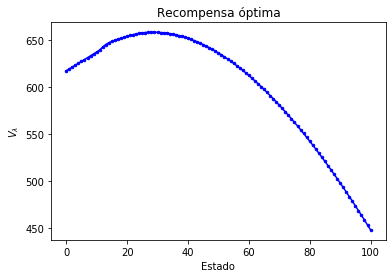

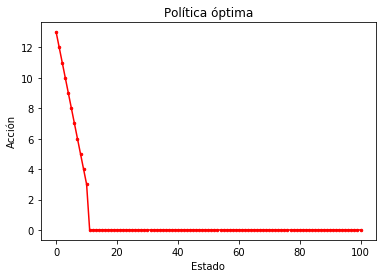

In [10]:
plt.figure()
plt.plot(np.arange(M+1), [valueGS[i] for i in estados], marker='o', ms=2.5, c='b')
plt.xlabel("Estado")
plt.ylabel(r'$V_\lambda$')
plt.title("Recompensa óptima")

plt.figure()
plt.plot(np.arange(M+1), [policyGS[i] for i in estados], marker='o', ms=2.5, c='r')
plt.xlabel("Estado")
plt.ylabel("Acción")
plt.title("Política óptima")

## Jacobi

In [11]:
#inicializa random policy y random value

policyJAC = {}
for s in acciones.keys():
    policyJAC[s] = np.random.choice(acciones[s])

valueJAC = {}
for s in estados:
    valueJAC[s] = 0
    
allValuesJAC = {}

### Algoritmo

In [12]:
iterat = 0
while True and iterat<10000:
    allValuesJAC[iterat] = valueJAC
    biggest_change = 0
    valueNuevo = {}
    for estado in estados:
        if estado in policyJAC:
            
            old_v = valueJAC[estado]
            new_v = 0
            
            for accion in acciones[estado]:
                v = [probTrans[(est2, estado, accion)]*valueJAC[est2] for est2 in estados if est2!=estado]
                v = rewards[(estado,accion)]/(1-gamma*probTrans[(estado,estado,accion)])+(gamma*np.sum(v)/(1-gamma*probTrans[(estado,estado,accion)]))
                if v>new_v:
                    new_v = v
                    policyJAC[estado] = accion
            
            valueNuevo[estado] = new_v
            biggest_change = max(biggest_change, np.abs(old_v-new_v))
    valueJAC = valueNuevo                            
    if biggest_change<epsilon:
        break
    iterat+=1 
    clear_output(wait=True)
    print("Iteration: ", iterat, "\nBiggest_change: ", biggest_change)
    

Iteration:  96 
Biggest_change:  0.0005946262490397203


Text(0.5, 1.0, 'Política óptima')

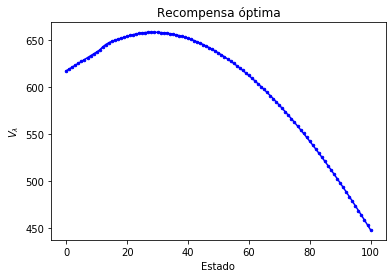

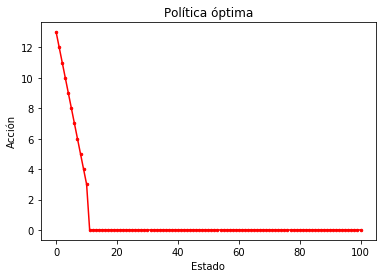

In [13]:
plt.figure()
plt.plot(np.arange(M+1), [valueJAC[i] for i in estados], marker='o', ms=2.5, c='b')
plt.xlabel("Estado")
plt.ylabel(r'$V_\lambda$')
plt.title("Recompensa óptima")

plt.figure()
plt.plot(np.arange(M+1), [policyJAC[i] for i in estados], marker='o', ms=2.5, c='r')
plt.xlabel("Estado")
plt.ylabel("Acción")
plt.title("Política óptima")

## Relación entre los tres métodos

In [14]:
valueOptima = valueGS
politicaOptima = policyGS

In [15]:
difNormVI = np.zeros(40)
difNormGS = np.zeros(40)
difNormJAC = np.zeros(40)
for i in range(40):
    restaVI = np.zeros_like(estados)
    restaGS = np.zeros_like(estados)
    restaJAC = np.zeros_like(estados)

    for s in estados:
        restaVI[s] = np.abs(allValuesVI[i][s]-valueOptima[s])
        restaGS[s] = np.abs(allValuesGS[i][s]-valueOptima[s])
        restaJAC[s] = np.abs(allValuesJAC[i][s]-valueOptima[s])
        
    difNormVI[i] = np.max(restaVI)
    difNormGS[i] = np.max(restaGS)
    difNormJAC[i] = np.max(restaJAC)

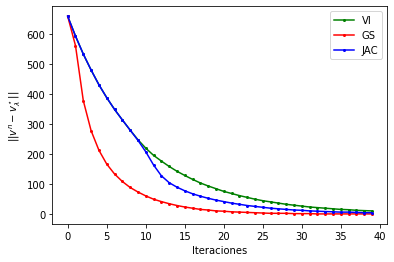

In [16]:
plt.plot(np.arange(40),difNormVI, label= 'VI', c='green', marker='o', ms=2)
plt.plot(np.arange(40),difNormGS, label= 'GS', c='red', marker='o', ms=2)
plt.plot(np.arange(40),difNormJAC, label = 'JAC', c='blue', marker='o', ms=2)
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel(r'$||v^n - v_\lambda^\star ||$')
plt.show()

## Cambiar c(s)

In [22]:
def O(u):
    if u!=0:
        return max(2+3*u-0.01*u*u, 0)
    elif u==0:
        return 0

rewards = {}
for estado in estados:
    for accion in acciones[estado]:
        rewards[(estado,accion)] = -O(accion) - h(estado+accion) + rewF(estado,accion)


In [23]:
#inicializa random policy y random value

policyGS2 = {}
for s in acciones.keys():
    policyGS2[s] = np.random.choice(acciones[s])

valueGS2 = {}
for s in estados:
    valueGS2[s] = 0
    
allValuesGS2 = {}

In [24]:
iterat = 0
while True and iterat<10000:
    allValuesGS2[iterat] = valueGS2.copy()
    biggest_change = 0
    for estado in estados:
        if estado in policyGS2:
            
            old_v = valueGS2[estado]
            new_v = 0
            
            for accion in acciones[estado]:
                v = [probTrans[(est2, estado, accion)]*valueGS2[est2] for est2 in estados]
                v = rewards[(estado,accion)]+gamma*np.sum(v)
                if v>new_v:
                    new_v = v
                    policyGS2[estado] = accion
            
            valueGS2[estado] = new_v
            biggest_change = max(biggest_change, np.abs(old_v-new_v))
                                 
    if biggest_change<epsilon:
        break
    iterat+=1 
    clear_output(wait=True)
    print("Iteration: ", iterat, "\nBiggest_change: ", biggest_change)

Iteration:  63 
Biggest_change:  0.0005934707477308621


Text(0.5, 1.0, 'Política óptima')

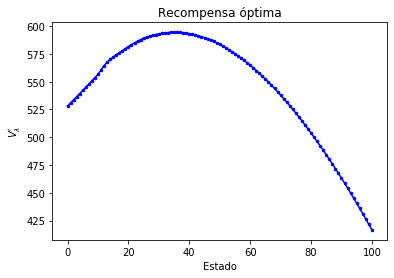

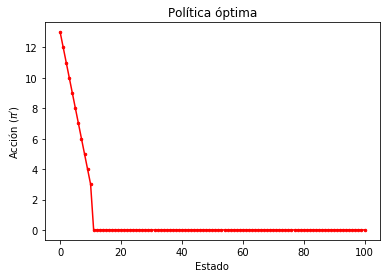

In [25]:
plt.figure()
plt.plot(np.arange(M+1), [valueGS2[i] for i in estados], marker='o', ms=2.5, c='b')
plt.xlabel("Estado")
plt.ylabel(r'$V_\lambda^\prime$')
plt.title("Recompensa óptima")

plt.figure()
plt.plot(np.arange(M+1), [policyGS2[i] for i in estados], marker='o', ms=2.5, c='r')
plt.xlabel("Estado")
plt.ylabel(r"Acción $(\pi^\prime)$")
plt.title("Política óptima")

Text(0.5, 1.0, 'Diferencia de políticas')

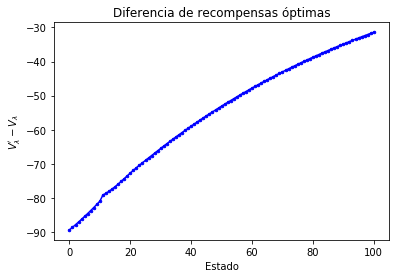

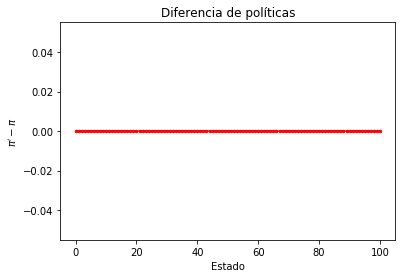

In [26]:
plt.figure()
plt.plot(np.arange(M+1), [valueGS2[i]-valueGS[i] for i in estados], marker='o', ms=2.5, c='b')
plt.xlabel("Estado")
plt.ylabel(r'$V_\lambda^\prime - V_\lambda$')
plt.title("Diferencia de recompensas óptimas")

plt.figure()
plt.plot(np.arange(M+1), [policyGS2[i]-policyGS[i] for i in estados], marker='o', ms=2.5, c='r')
plt.xlabel("Estado")
plt.ylabel(r'$\pi^\prime - \pi$')
plt.title("Diferencia de políticas")

## Ver cuando lambda tiende a 1

In [29]:
gamma = 0.9
epsilon = 1e-2*(1-gamma)/(2*gamma)
demanda = poisson(10)
M = 100

In [30]:

def valGamma(gamma):
    epsilon = 1e-2*(1-gamma)/(2*gamma)
    rewards = {}
    for estado in estados:
        for accion in acciones[estado]:
            rewards[(estado,accion)] = (-O(accion) - h(estado+accion) + rewF(estado,accion))*(1-gamma)

    policyGS = {}
    for s in acciones.keys():
        policyGS[s] = np.random.choice(acciones[s])

    valueGS = {}
    for s in estados:
        valueGS[s] = 0

    iterat = 0
    while True and iterat<10000:
        allValuesGS[iterat] = valueGS.copy()
        biggest_change = 0
        for estado in estados:
            if estado in policyGS:

                old_v = valueGS[estado]
                new_v = 0

                for accion in acciones[estado]:
                    v = [probTrans[(est2, estado, accion)]*valueGS[est2] for est2 in estados]
                    v = rewards[(estado,accion)]+gamma*np.sum(v)
                    if v>new_v:
                        new_v = v
                        policyGS[estado] = accion

                valueGS[estado] = new_v
                biggest_change = max(biggest_change, np.abs(old_v-new_v))

        if biggest_change<epsilon:
            break
        iterat+=1 
        clear_output(wait=True)
        print("Iteration: ", iterat, "\nBiggest_change: ", biggest_change)
        
    return valueGS, policyGS

In [31]:
policies = {}
for gamma in [0.9, 0.95, 0.97, 0.99, 0.999]:
    _ , policyGS = valGamma(gamma)
    policies[gamma] = [policyGS[i] for i in estados]


Iteration:  5088 
Biggest_change:  5.00960477722856e-06


Text(0.5, 1.0, 'Política óptima')

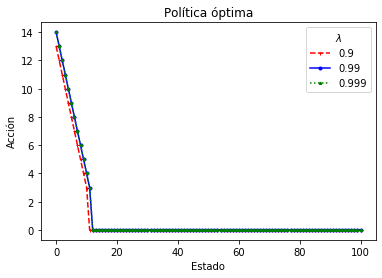

In [32]:
import itertools
marker = itertools.cycle(('+', 'o', '*')) 
lineas = itertools.cycle(('--', '-', ':'))
colorss = itertools.cycle(('red', 'blue', 'green'))
for p in policies:
    if p!=0.97 and p!=0.95:
        plt.plot(np.arange(M+1), policies[p],marker=next(marker),ms='3', ls=next(lineas), c=next(colorss), label = "{f}".format(f=p))
plt.legend(title= r'$\lambda$')
plt.xlabel("Estado")
plt.ylabel("Acción")
plt.title("Política óptima")

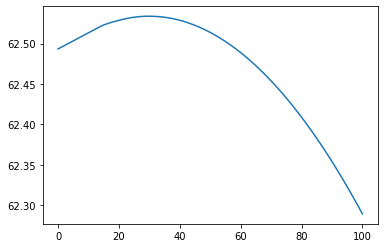

In [88]:
plt.plot(np.arange(M+1), [_[j] for j in _])

In [38]:
policies[0.9][0:15]

[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 0, 0]

In [39]:
policies[0.95][0:15]

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 0, 0, 0, 0]

In [40]:
policies[0.97][0:15]

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 0]

In [41]:
policies[0.99][0:15]

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 0]

In [42]:
policies[0.999][0:15]

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 0, 0, 0]